# [ 6년 전과의 빵 비교 ]

## 1. 언급 빵집순위
#### - '빵집이름' 열, 단순 빈도로 나열
#### - 유의한 변화가 있는지? 
+ 2020 서울 빵집 순위
+ 2020 지역별 빵집 순위
+ 2019.08 ~ 2020.07 vs 2013.08 ~ 2014.07

---------

## 2. 내용에 언급된 단어에 변화가 있을까?
#### - '내용' 열, 전처리 필요 - 빵 용어 + 데이터 보고 직접추가하기?
#### - 유의한 변화가 있는지?
+ 2020 내용의 단어 순위 vs 2014 내용의 단어 순위
+ 순위 시각화

---------

## 3. 연관어 분석
#### - '내용' 데이터 토대로 같은 문장에 언급된 단어.
#### - 같은 글 안에 언급된 단어도 처리할 수 있을까?
+ 2020 + 2014 합쳐서 연관어 분석 
+ 시각화

In [1]:
# 크롤링 위한 패키지
#from selenium import webdriver
#from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import csv

# 명사 추출하기 위한 라이브러리 konlpy 설치
# 추출 명사 count를 위한 collection
from konlpy.tag import Okt
from collections import Counter

# 연관어 분석 패키지 로딩하기
import numpy as np
import glob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from gensim.models.word2vec import Word2Vec

# 네트워크 분석
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import operator

# 시각화
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager
#import pytagcloud  # error : No module named 'pygame', 하지만 하고 싶은것은 돼서 그냥 두었다.
from matplotlib.pyplot import figure

In [138]:
! pip3 install git+https://github.com/python-visualization/branca.git@master

  Cloning https://github.com/python-visualization/branca.git (to revision master) to /private/var/folders/0f/3kvptjj52h51rwnrbz5lvf6h0000gn/T/pip-req-build-1wk54_ux
Using legacy 'setup.py install' for branca, since package 'wheel' is not installed.
  Attempting uninstall: branca
    Found existing installation: branca 0.4.1
    Uninstalling branca-0.4.1:
      Successfully uninstalled branca-0.4.1
    Running setup.py install for branca ... done


# 1. 언급 빵집 순위

## 1) 2014 vs 2020 전국 베이커리 순위 

In [2]:
# 시각화 위한 함수 
def showGraph(wordInfo):
    
    font_location = "/Library/Fonts/Arial Unicode.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()

#[CODE 2]
def saveWordCloud(wordInfo, filename):
    
    taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
    pytagcloud.create_tag_image(taglist, filename, size=(640, 480), fontname='korean', rectangular=False)
    webbrowser.open(filename)   
    

In [23]:
def countGraph(df, num):
    # df에서 빵집이름 컬럼 선택 
    df = df['빵집이름'].tolist()
    df = [x for x in df if str(x) != 'nan']
    df = [x for x in df if str(x) != '[]']
    df = [x for x in df if str(x) != '성심당']
    df = [x for x in df if str(x) != '아빠의꿈']
    df = [x for x in df if str(x) != '빵집']
    df = [x for x in df if str(x) != '안스베이커리']
    df = [x for x in df if str(x) != '풍년제과']
    df = [x for x in df if str(x) != '시오코나']
    df = [x for x in df if str(x) != '옵스']
    df = [x for x in df if str(x) != '이성당']
    df = [x for x in df if str(x) != '르배']
    df = [x for x in df if str(x) != '마카롱']

    bk_list = []
    for i in range(0, len(df)):
            bk_list.append(df[i].split())

    # 명사빈도 카운트
    count = Counter(df)

    # 시각화
    wordInfo = dict()
    for tags, counts in count.most_common(num):
        if (len(str(tags)) > 1):
            wordInfo[tags] = counts
            print ("%s : %d" % (tags, counts))

    showGraph(wordInfo)

## 2) 2014 vs 2020 서울베이커리 순위

디어브레드 : 62
쟝블랑제리 : 60
우스블랑 : 57
브레드 : 56
빵나무 : 54
팥고당 : 54
프랑세즈 : 53
오월의종 : 51
롤링핀 : 51
훕훕베이글 : 46
패스트리모니크 : 45
블랑제리 : 43
이름없는가게 : 40
좋은아침 : 39
르빵 : 38
퍼블리크 : 38
본누벨 : 38
라틀리에모니크 : 34
플라워앤 : 32
하이몬드 : 30


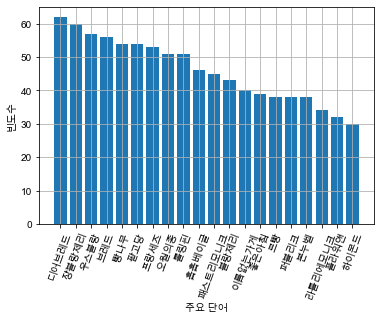

In [26]:
bk6ago = pd.read_csv('data-bakery_final_2015_tmp.csv')  
countGraph(bk6ago, 21)

쟝블랑제리 : 153
어글리베이커리 : 142
루엘드파리 : 99
르빵 : 90
오월의종 : 85
소울브레드 : 63
이몸이만든빵 : 58
투떰즈업 : 42
코코로카라 : 38
빵어니스타 : 37
홈앤브레드 : 37
효모 : 37
머드스콘 : 34
블랑제리코팡 : 33
키에리 : 29
츄이구이브레드 : 27
아티장베이커스 : 27
브레드숨 : 26
카멜리온 : 26
망넛이네 : 26


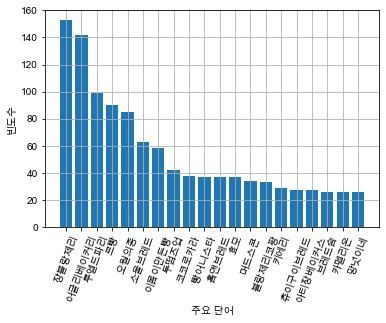

In [5]:
bk = pd.read_csv('data-bakery_final_2020.csv')  
countGraph(bk, 20)

In [22]:
len(bk)

3970

## 3) 2014 vs 2020 수도권 베이커리 지도

In [6]:
import folium

In [20]:
bk20 = pd.read_csv('bakery_which2020.csv', engine='python')  
bk14 = pd.read_csv('bakery_which2014.csv', engine='python')
bk20.dropna(inplace=True)
bk14.dropna(inplace=True)

In [15]:
# 지도에 표시
def drawMap(df):
    bkmap = folium.Map(location=[37.4235428, 126.979006], zoom_start=12)
    for item in df.index:
        lat = df.loc[item,'latitude']
        long = df.loc[item,'longitude']
        folium.CircleMarker([lat,long],
                           radius = df.loc[item,'count']/5,
                           popup=df.loc[item,'name'],
                           color='blue',
                           fill=True).add_to(bkmap)
    return bkmap

In [19]:
drawMap(bk20)

In [21]:
drawMap(bk14)

# 2. 언급된 단어의 변화

In [ ]:
# 명사 추출하기 위한 라이브러리 konlpy 설치
# 추출 명사 count를 위한 collection
from konlpy.tag import Okt
from collections import Counter

# 말뭉치 만들고 토크나이즈
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

In [ ]:
# 파일 불러오기
bk6ago = pd.read_csv('data-bakery_final_2015_tmp.csv')

content = bk6ago.loc[:,"내용"]
content.head(3)
#print(okt.morphs(total[1][3]))
#print(okt.(total[1][3]))

In [ ]:
# okt 객체 생성
okt = Okt()
word = []

# okt 단어 사전에 추가해주기 ---> 어려웠음ㅎ,,,

# 명사 추출
noun = []
for i in range(0,len(content)):
    noun += okt.nouns(content[i])

In [ ]:
##################################
### 그냥 실험 morphs, pos 이용  #####
##################################

# 품사 포함 단어 추출
for i in range(0, len(content)):
    word += okt.morphs(content[i])
    
# 품사별 추출
pos = []
for i in range(0,len(content)):
    pos += okt.pos(content[i])

#print(word[0])
#print(noun[0])
#type(pos) : list
for i in range(20):
    if pos[i][1] != 'Josa':
        print(pos[i])

In [ ]:
# 명사빈도 카운트
count = Counter(noun)
noun_list = count.most_common(150)

print(noun_list)

In [ ]:
# 불용어 제거 후 명사빈도 카운트
count = Counter(noun)
noun150 = count.most_common(300)
noun_count = []
stop = "곳, 글, 역시, 요즘, 아주, 드, 비, 반, 글리, 것, 저, 제, 더, 안, 이, 좀, 정말, 때, 분, 정도, 개, 후기, 전, 집, 그냥, 또, 도, 원, 다음, 달, 요거, 입, 다른, 수, 속, 점, 나, 류, 못, 은, 번, 시, 걸, 만, 덕"

#print(noun150[0][0])
#print(stop_list)

for i in range(0,300):
    if noun150[i][0] not in stop:
        noun_count.append(noun150[i])
        
print(noun_count)

### WordCloud

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf',\
              background_color = "white", \
              width = 1000, \
              height = 1000, \
              max_words = 150, \
              max_font_size = 300)

# 불용어 처리 전
wc.generate_from_frequencies(dict(noun_count))
wc.to_file('wordcloud_6ago.png')

# 3. 연관어 분석

## 1) 2020 빵소담 단어 네트워크 분석

## 방법 1 ) 
#### *너무너무너무너무 오래 걸리니 하지 말 것*

### KoNLPY 사용하여 형태소 분석 및 DTM만들기

In [14]:
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

In [40]:
bakery2020 = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/data-bakery2020_pre_content.csv')

In [125]:
title_list = bakery2020['Title'].tolist()
content_list = bakery2020['Content'].tolist()

['후기 매장 명: 코코로카라 바나나오레오, 카라벨라다크푸딩에 이어 바나나, 미쯔말차, 발로나밀크 먹어본 후기 가져왔어요 . <바나나푸딩>바나나의 부드럽고 달콤함 + 닐라웨이퍼의 촉촉 달달 고소함 + 생과일바나나의 신선함 까지 합해져서 찰떡궁합이에요 . 바나나 좋아하시는 분은 100프로 좋아하실맛익숙하지만 특별해요 💗 바나나 덕후분들 메모메모🍌 <발로나밀크푸딩>카라벨라다크푸딩과는 또다른 매력이있는 푸딩이에요밀크초코지만 생각보다 엄청 달지않은 점이 더 맘에 들었어요 . 그렇다고 안 달다고는 안했습니다 초코의 풍미가 엄청 잘 느껴지고 부재료들이랑 궁합도 너무 좋아요 다크푸딩과 마찬가지로 오렌지필들어있구요중간중간 상큼함 오렌지가 씹혀서 질리지않고 더 맛있게 먹을 수 있었어요 저는 신기하게도 다크보다 밀크가 더 술술 들어가더라구요 ?? 초코 좋아하시면 그냥 드셔주세요💗🍫 <미쯔말차푸딩>제가 어린이입맛에 가까워서 말차 특유의 쌉쌀함이 너무 강하면 잘 못먹는편이라 살 때 고민을 가장 많이 했던 푸딩이었어요 근데 사길 정말 잘했다는 생각이 드는 푸딩. 지금까지 먹어본 코코로푸딩중에선 이게 1등이었구요아주 진한 말차를 선호하시는 분들은 조금 약하다고 아쉬워하실 수 있겠지만 전 딱 좋은 정도였어요엄청 달지않고 부드러우면서도 말차의 매력은 살아있는 .약간 말차라떼느낌 ?? 거기에 미쯔랑 초콜릿까지 오독오독 씹히니까 진짜 맛있어서 미치겠더라구요 ㅠㅠㅠ 저 수요일에 또 갈 예정인데 이거 사러 가는게 가장 큰 이유에요녹린이인 저도 반할만큼 맛있고, 대중적인 말차맛이니까 저같은 분들 꼭 드셔보셨음 좋겠어요💗 저희집에 코코로카라가 가까운 거리는 아니에요하지만 그럼에도 불구하고 계속 가게되는 곳이구 제 마음속 푸딩 맛집 1등입니다 🔥 다들 꼭 드셔보셨음 좋겠네요😆', '. 후기 매장 명: 우부래도일단 사진 죄송해요. 제가 형이다보니 사람들 있는곳에 당당하게 사진을 못찍겠어서 거의 몰카찍듯이 어케 나오는지도 안보고 찍어버렸어요..오후 3시 쫌 넘어서 갔는데 이미 많이 솔드아웃되있더라구요..

7135

In [52]:
okt = Okt()

cv = CountVectorizer()
corpus = []
for i in range(0,len(content_list)):
    noun_list = okt.nouns(content_list[i])
    corpus.append(' '.join(noun_list))

In [53]:
DTM_Array = cv.fit_transform(corpus).toarray()
feature_names = cv.get_feature_names()
DTM_DataFrame = pd.DataFrame(DTM_Array, columns = feature_names)

DTM_DataFrame.to_csv('/Users/aohus/Documents/workspaces/Python/Studying/DTM2020.csv')

### NetworkX를 사용하여 단어 동시 출현 분석

In [57]:
import networkx as nx
from tqdm import tqdm 

In [105]:
content_noun = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/DTM2020.csv')
column_list = content_noun.columns[1:]
print(column_list)

Index(['가가', '가게', '가겐', '가겟숩니', '가격', '가격택', '가격표', '가계', '가공', '가공품',
       ...
       '힌줄', '힌판', '힐것', '힐링', '힐튼', '힘껏', '힘단', '힘들엇어', '힙지로답', '힙하'],
      dtype='object', length=19702)


In [103]:
word_length = len(column_list)
count_dict = {}

count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i],column_list[j]),0) + max(tmp[word1], tmp[column_list[j]])
"""
for doc in tqdm(range(len(content_noun)), desc='단어쌍 만들기'):
    tmp = content_noun.loc[doc]
    for i, word1 in enumerate(column_list):
        if tmp[word1]:
            for j in range(i+1, word_length):
                if tmp[column_list[j]]:
                    count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i],column_list[j]),0) + max(tmp[word1], tmp[column_list[j]])

count_list = []
for words in count_dict:
    count_list.append([words[0], words[1], count_dict[words]])
    
df = pd.DataFrame(count_list, columns=["word1", "words", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

df.to_csv('/Users/aohus/Documents/workspaces/Python/Studying/networkx2020.csv')
"""

단어쌍 만들기:   0%|          | 0/7135 [00:00<?, ?it/s]


NameError: name 'coun_dict' is not defined

### 단어 네트워크 시각화

In [ ]:
# ! pip3 install operator

In [64]:
import operator
import matplotlib.pyplot as plt

In [68]:
# 단어 순서쌍 데이터
dataset = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/networkx2020.csv')

# 중심성 척도 계산을 위한 그래프
G_centrality = nx.Graph()

# 빈도수가 200 이상인 단어쌍에 대해서 edge
for ind in range((len(np.where(dataset['freq'] >= 200)[0]))):
    G_centrality.add_edge(dataset['word1'][ind], data['word2'][ind], weight=int(dataset['freq'][ind]))
dgr = nx.degree_centrality(G_centrality)       # 연결중심
btw = nx.betweenness_centrality(G_centrality)  # 매개중심
cls = nx.closeness_centrality(G_centrality)    # 근접중심
#egv = nx.eigenvector_centrality(G_centrality)  # 고유벡터
pgr = nx.pagerank(G_centrality)                # 페이지랭크

# 중심성이 큰 순서대로 정렬
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
#sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

In [79]:
# 단어 네트워크를 그려줄 그래프
G = nx.Graph()

# 페이지 랭크에 따라 두 노트 사이의 연관성을 결정한다.(단어쌍의 연관성)
# 연결 중심성으로 계산한 척도에 따라 노드의 크기가 결정되다.(단어의 빈도수)
for i in range(len(sorted_pgr)):
    G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])
for ind in range((len(np.where(dataset['freq'] > 200)[0]))):
    G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

# 노드 크기 조정
sizes = [G.nodes[node]['nodesize'] * 500 for node in G]
options = {
    'edge_color' : '#FFDEA2',
    'width':1,
    'with_labels':True,
    'font_weight': 'regular'
}

# 폰트 설정을 위한 font_manager
# import matplotlib.font_manager as fm - 위에 from matplotlib import font_manager , rc
# import matplotlib.pyplot as plt - 위에
font_fname = '/Library/Fonts/Arial Unicode.ttf'
fontprop = font_manager.FontProperties(fname = font_fname, size=18).get_name()
nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100), **options, font_family=font_prop)
ax = plt.gca()
ax.collections[0].set_edgecolor('#555555')
plt.show()


NameError: name 'font_prop' is not defined

#### *속도를 높여봅시다*
## 방법 2 )
### (1) 게시글 단위 (2) 문장 단위

In [17]:
#bakery2020 = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/data-bakery2020_pre_content.csv')

okt = Okt()

# 게시글 단위 본문
content_list = bk6ago['내용'].tolist()

In [18]:
# 문장단위 본문
line_list = []
for i in range(len(content_list)):
    sentence = []
    sentence = re.split("[.!? \"어요\" \"니다\"] ", content_list[i])
    for j in range(len(sentence)):
        line_list.append(sentence[j])
print(line_list[1:10])
print(len(line_list))

['저는 완전 좋아해', '특히 씨포의 크렙케익이라면 마다할 이유가 없죠 얇은 크레페 사이로 켜켜이 크림이 샌드되', '있는 황홀한 단면 ㅠㅠ정말 씨포의 크렙케익은 짱짱이예', '여기는 데리고 간 지인마', '다들 이런 곳 알려줘서 고맙다고 할 정도 그리고 빵은 아니지만 크렙케익 못지 않게 강추하고픈 메뉴는 바로 밀크티빙수 눈꽃빙수와는 또 다른 얼음결 절대 거칠지 않아', '사르르 녹아', '팥을 따로 줘서 취향에 따라 먹을 수 있', '더욱 좋아', '위치는 가로수길 메인 스트리트는 아니고 신사중학교 맞은 편이라고 생각하고 가시는 게 더 편할 것 같아']
117860


In [19]:
text = "python is, an easy;lan! guage; to, learn."
print(re.split("[;!] ", text))

['python is, an easy;lan', 'guage', 'to, learn.']


### 속도를 높이기 위한 방법1: 단어에 고유 ID를 부여

In [20]:
class VocabDict:
# 단어에 고유 ID를 부여해주는 클래스
    def __init__(self):
        self.d = {}  # 단어->단어ID로 변환할때 사용
        self.w = []  # 단어ID->단어로 변환할 때 사용
 
    def getIdOrAdd(self, word):
# 단어가 이미 사전에 등록된 것이면 해당하는 ID를 돌려주고
        if word in self.d: return self.d[word]
# 그렇지 않으면 새로 사전에 등록하고 ID를 부여함
        self.d[word] = len(self.d)
        self.w.append(word)
        return len(self.d) - 1
 
    def getId(self, word):
# 단어가 사전에 등록되어있는 경우 ID를 돌려주고
        if word in self.d: return self.d[word]
# 그렇지 않은 경우 -1을 돌려줌
        return -1
 
    def getWord(self, id):
        return self.w[id]

### 속도를 높이기 위한 방법2 : 빈도수 10 이하인 단어 & 1글자 단어는 분석에서 제외

#### 게시글 기준

In [22]:
vDict = VocabDict()
vDictFiltered = VocabDict()
wcount = {}  # 단어별 빈도가 저장될 dict

# 파일을 훑으며 단어별 빈도를 계산함
for line in content_list:
    words =list(set(okt.nouns(line)))
    for w in words:
        wid = vDict.getIdOrAdd(w)
        wcount[wid] = wcount.get(wid, 0) + 1
for wid, num in wcount.items():
    if num < 10 : continue
    # 10회 이상 등장한 것들만 vDictFiltered에 저장함
    vDictFiltered.getIdOrAdd(vDict.getWord(wid))
#vDict = None  # vDict에 할당된 메모리 반납

In [23]:
count = {}   #동시출현 빈도가 저장될 dict

setdiff = {"제", "저", "이","곳","진짜","생각","정말","후기","그냥","다른","하나","정도","이건","매장","뭔가","자주","무난","오늘","또",
           "명","위","걸","입","꼭","개","중","분","수","글","중","때","거", "좀", "안", "것", "여기","달","더","맛","함", "부", 
           "맘", "날", "번", "덕", "도", "나","베이커리", "점", "약간", "조금", "다음", "살짝", "바로",
           "감","느낌","말", "지금","계속","부분","전","뭐","거의","전","빵집","빵","거기","다시","편이","미가","한번","일단","이구",
          "집","해","줄","길","가장"}
           
# 파일을 다시 훑으며 동시출현빈도를 계산함         
for line in content_list:
    words = list(set(okt.nouns(line)) - setdiff)  #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경

#vDictFiltered에 포함된 단어들에 대해서만 wid를 구함
    wids = list(filter(lambda wid : wid>=0, [vDictFiltered.getId(w) for w in words]))
    for i, a in enumerate(wids):
        for b in wids[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count[a, b] = count.get((a, b), 0) + 1   #실제로 센다
            # print(count[a, b])

In [24]:
count_list = []
for words in count:
    count_list.append([vDictFiltered.getWord(words[0]), vDictFiltered.getWord(words[1]), count[words]])

df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

df.to_csv('networkx_6ago.csv')

#### 문장 기준

In [25]:
"""
vDict = VocabDict()
vDictFiltered = VocabDict()
wcount = {}  # 단어별 빈도가 저장될 dict

# 파일을 훑으며 단어별 빈도를 계산함
for line in line_list:
    words =list(set(okt.nouns(line)))
    for w in words:
        wid = vDict.getIdOrAdd(w)
        wcount[wid] = wcount.get(wid, 0) + 1
for wid, num in wcount.items():
    if num < 10 or len(vDict.getWord(wid)) == 1: continue
    # 10회 이상 등장한 것들만 vDictFiltered에 저장함
    # if num < 10 & len(vDict.getWord(wid)) > 1 : 
    vDictFiltered.getIdOrAdd(vDict.getWord(wid))
#vDict = None  # vDict에 할당된 메모리 반납
"""

count = {}   #동시출현 빈도가 저장될 dict
setdiff = {"제", "저", "이","곳","진짜","생각","정말","후기","그냥","다른","하나","정도","이건","매장","뭔가","자주","무난","오늘","또",
           "명","위","걸","입","꼭","개","중","분","수","글","중","때","거", "좀", "안", "것", "여기","달","더","맛","함", "부", 
           "맘", "날", "번", "덕", "도", "나","베이커리", "점", "약간", "조금", "다음", "살짝", "바로",
           "감","느낌","말", "지금","계속","부분","전","뭐","거의","전","빵집","빵","거기","다시","편이","미가","한번","일단","이구",
          "집","해","줄","길","가장"}
           
# 파일을 다시 훑으며 동시출현빈도를 계산함         
for line in line_list:
    words = list(set(okt.nouns(line)) - setdiff)  #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
    
#vDictFiltered에 포함된 단어들에 대해서만 wid를 구함
    wids = list(filter(lambda wid : wid>=0, [vDictFiltered.getId(w) for w in words]))
    for i, a in enumerate(wids):
        for b in wids[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count[a, b] = count.get((a, b), 0) + 1   #실제로 센다
            # print(count[a, b])
            
count_list = []
for words in count:
    count_list.append([vDictFiltered.getWord(words[0]), vDictFiltered.getWord(words[1]), count[words]])

df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

df.to_csv('networkx2013_line.csv')

### 시각화

In [68]:
def drawNetworkx(dataset, num, k, iterations):
    # 중심성 척도 계산을 위한 그래프
    G_centrality = nx.Graph()

    # 빈도수가 1000 이상인 단어쌍에 대해서 edge
    for ind in range((len(np.where(dataset['freq'] >= num)[0]))):
        G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight=int(dataset['freq'][ind]))
    dgr = nx.degree_centrality(G_centrality)       # 연결중심
    btw = nx.betweenness_centrality(G_centrality)  # 매개중심
    cls = nx.closeness_centrality(G_centrality)    # 근접중심
    #egv = nx.eigenvector_centrality(G_centrality)  # 고유벡터
    pgr = nx.pagerank(G_centrality)  

    # 중심성이 큰 순서대로 정렬
    sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
    sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
    sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
    #sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
    sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

    # 단어 네트워크를 그려줄 그래프
    G = nx.Graph()

    # 페이지 랭크에 따라 두 노트 사이의 연관성을 결정한다.(단어쌍의 연관성)
    # 연결 중심성으로 계산한 척도에 따라 노드의 크기가 결정되다.(단어의 빈도수)
    for i in range(len(sorted_dgr)):
        G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])
    for ind in range((len(np.where(dataset['freq'] > num)[0]))):
        G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

    # 노드 크기 조정
    sizes = [G.nodes[node]['nodesize'] * 500 for node in G]
    options = {
        'edge_color' : '#F0E5DE',
        'width':1.5,
        'with_labels':True,
        'font_weight': 'regular'
    }

    figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

    # 폰트 설정을 위한 font_manager
    # import matplotlib.font_manager as fm - 위에 from matplotlib import font_manager , rc
    # import matplotlib.pyplot as plt - 위에
    font_fname = '/Library/Fonts/Arial Unicode.ttf'
    font_prop = font_manager.FontProperties(fname = font_fname, size=18).get_name()
    nx.draw(G, node_size=sizes, node_color = '#eb9f9f',pos=nx.spring_layout(G, k=k, iterations=iterations), **options, font_family=font_prop)
    ax = plt.gca()
    ax.collections[0].set_edgecolor('#F0E5DE')
    plt.show()

In [27]:
# 단어 순서쌍 데이터
dataset_page = pd.read_csv('networkx_6ago.csv')
dataset_line = pd.read_csv('networkx2013_line.csv')

#### 게시글 기준

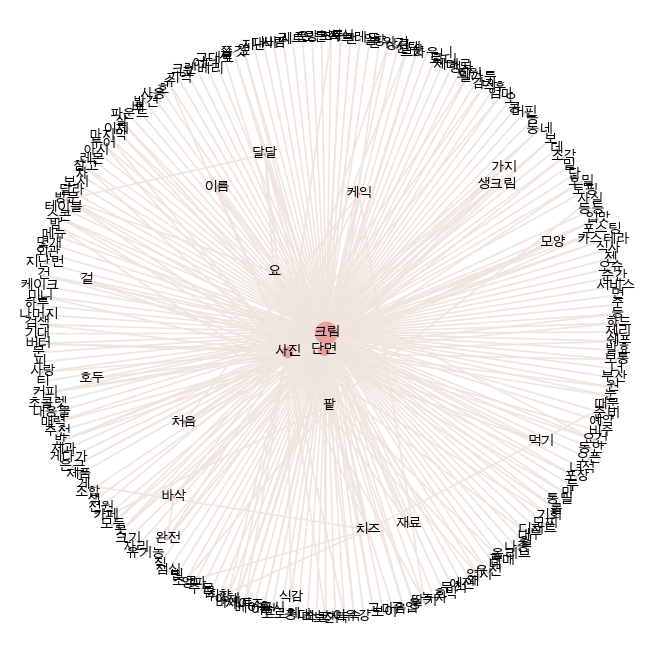

In [99]:
drawNetworkx(dataset_page, 3000, 300, 1000)

#### 문장 기준

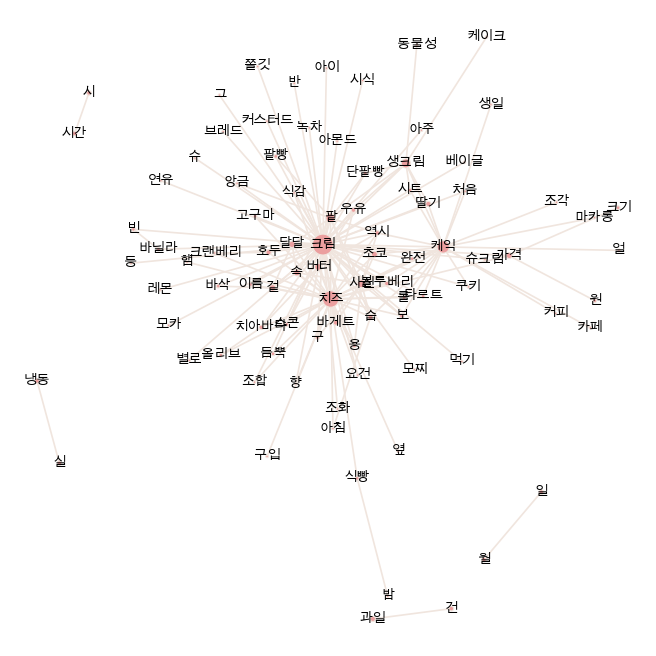

In [80]:
drawNetworkx(dataset_line, 300, 10, 200)